In [33]:
import pandas as pd

df = pd.read_csv("dataset_lemon.csv")

In [34]:
df.head()

,diameter,berat,tebal_kulit,kadar_gula,asal_daerah,musim_panen,warna,kualitas
0,57.1,105,3.7,8.4,California,Puncak,Kuning cerah,Grade A
1,60.2,118,3.8,8.2,Malang,Puncak,Kuning cerah,Grade A
2,48.5,80,4.6,7.8,Medan,Akhir,Kuning kehijauan,Grade B
3,65.8,136,5.1,7.0,California,Akhir,Hijau pekat,Reject
4,55.9,101,3.5,8.5,Malang,Awal,Kuning cerah,Grade A


In [35]:
df.tail()

,diameter,berat,tebal_kulit,kadar_gula,asal_daerah,musim_panen,warna,kualitas
790,54.9,98,4.2,7.7,Medan,Akhir,Kuning kehijauan,Grade B
791,67.2,141,5.7,6.8,California,Akhir,Hijau pekat,Reject
792,57.0,105,3.5,8.4,Malang,Awal,Kuning cerah,Grade A
793,51.1,89,4.5,7.9,Medan,Puncak,Kuning kehijauan,Grade B
794,59.0,110,3.9,8.0,California,Puncak,Kuning cerah,Grade A


In [36]:
df.dtypes

diameter       float64
berat            int64
tebal_kulit    float64
kadar_gula     float64
asal_daerah     object
musim_panen     object
warna           object
kualitas        object
dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diameter     795 non-null    float64
 1   berat        795 non-null    int64  
 2   tebal_kulit  795 non-null    float64
 3   kadar_gula   795 non-null    float64
 4   asal_daerah  795 non-null    object 
 5   musim_panen  795 non-null    object 
 6   warna        795 non-null    object 
 7   kualitas     795 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 49.8+ KB


In [38]:
df.describe()

,diameter,berat,tebal_kulit,kadar_gula
count,795.000000,795.000000,795.000000,795.000000
mean,56.646918,105.427673,4.324906,7.772075
std,6.134574,19.890398,0.711215,0.514304
min,45.500000,70.000000,3.400000,6.700000
25%,51.600000,91.000000,3.800000,7.400000
50%,56.100000,103.000000,4.200000,7.900000
75%,61.300000,121.000000,4.600000,8.200000
max,68.500000,145.000000,6.000000,8.600000


In [39]:
df.columns

Index(['diameter', 'berat', 'tebal_kulit', 'kadar_gula', 'asal_daerah',
       'musim_panen', 'warna', 'kualitas'],
      dtype='object')

In [40]:
df["diameter"].value_counts()

diameter
51.6    13
51.7    12
54.7    12
50.6    12
54.3    12
        ..
46.0     1
62.0     1
55.5     1
65.0     1
50.0     1
Name: count, Length: 156, dtype: int64

In [41]:
df["berat"].value_counts()

berat
91     50
89     27
98     26
105    26
110    26
       ..
123     1
137     1
115     1
109     1
73      1
Name: count, Length: 64, dtype: int64

In [42]:
df["tebal_kulit"].value_counts()

tebal_kulit
4.5    78
3.9    54
3.8    53
3.5    53
4.2    53
4.0    53
3.7    53
3.6    53
4.3    52
4.6    27
4.4    27
4.1    27
3.4    27
5.9    26
4.7    26
4.9    26
6.0    26
5.0    26
5.6    26
5.7    26
5.1     1
5.8     1
5.5     1
Name: count, dtype: int64

In [43]:
df["kadar_gula"].value_counts()

kadar_gula
8.1    79
8.0    54
8.4    53
8.2    53
8.3    53
7.7    53
7.9    53
7.6    53
6.8    52
7.5    52
7.4    52
7.8    27
8.5    27
7.2    27
8.6    27
7.3    26
6.7    26
7.1    26
7.0     1
6.9     1
Name: count, dtype: int64

In [44]:
df["asal_daerah"].value_counts()

asal_daerah
California    265
Malang        265
Medan         265
Name: count, dtype: int64

In [45]:
df["musim_panen"].value_counts()

musim_panen
Puncak    318
Akhir     239
Awal      238
Name: count, dtype: int64

In [46]:
df["warna"].value_counts()

warna
Kuning cerah        346
Kuning kehijauan    290
Hijau pekat         159
Name: count, dtype: int64

In [47]:
df["kualitas"].value_counts()

kualitas
Grade A    346
Grade B    290
Reject     159
Name: count, dtype: int64

In [49]:
df.shape

(795, 8)

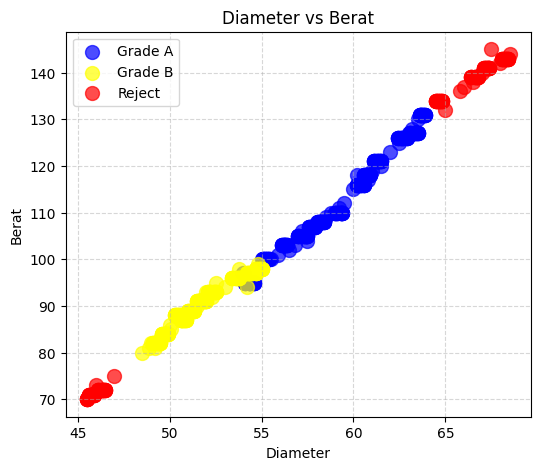

In [58]:
import matplotlib.pyplot as plt

grade_a = df[df["kualitas"]=="Grade A"]
grade_b = df[df["kualitas"]=="Grade B"]
reject = df[df["kualitas"]=="Reject"]

plt.figure(figsize=(6,5))

plt.scatter(grade_a["diameter"], grade_a["berat"], s=100, alpha=0.7, color="blue", label="Grade A")
plt.scatter(grade_b["diameter"], grade_b["berat"], s=100, alpha=0.7, color="yellow", label="Grade B")
plt.scatter(reject["diameter"], reject["berat"], s=100, alpha=0.7, color="red", label="Reject")
plt.xlabel("Diameter")
plt.ylabel("Berat")
plt.title("Diameter vs Berat")
plt.legend()
plt.grid(True,linestyle="--",alpha=0.5)
plt.show()

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["diameter","berat","tebal_kulit","kadar_gula","asal_daerah","warna","musim_panen"]]
y = df["kualitas"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["diameter", "berat", "tebal_kulit", "kadar_gula"]
categorical_columns = ["asal_daerah","musim_panen"]
ordinal_columns = ["warna"]

warna_order = ["Hijau pekat", "Kuning kehijauan", "Kuning cerah"]
ordinal_order = [warna_order]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns),
        ("oe", OrdinalEncoder(categories=ordinal_order), ordinal_columns)
    ]
)

model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LogisticRegression())
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy : 1.0

Classification Report :
               precision    recall  f1-score   support

     Grade A       1.00      1.00      1.00        71
     Grade B       1.00      1.00      1.00        53
      Reject       1.00      1.00      1.00        35

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159


Confusion Matrix :
 [[71  0  0]
 [ 0 53  0]
 [ 0  0 35]]


In [78]:
print(X_train["warna"].unique())

['Kuning kehijauan' 'Kuning cerah' 'Hijau pekat']


In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Scores :", scores)
print("Mean Accuracy :", scores.mean())

Scores : [1. 1. 1. 1. 1.]
Mean Accuracy : 1.0


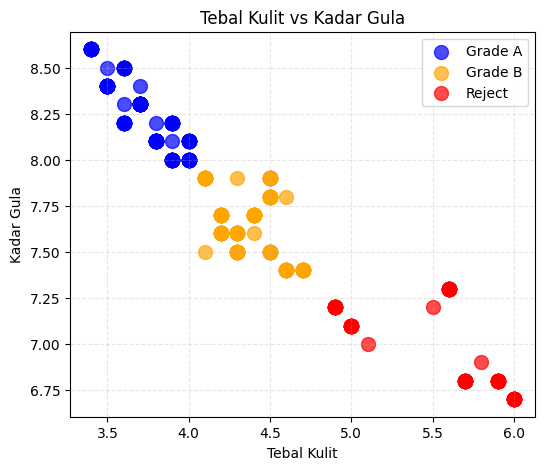

In [72]:
import matplotlib.pyplot as plt

grade_a = df[df["kualitas"]=="Grade A"]
grade_b = df[df["kualitas"]=="Grade B"]
reject = df[df["kualitas"]=="Reject"]

plt.figure(figsize=(6,5))

plt.scatter(grade_a["tebal_kulit"], grade_a["kadar_gula"], s=100, alpha=0.7, color="blue", label="Grade A")
plt.scatter(grade_b["tebal_kulit"], grade_b["kadar_gula"], s=100, alpha=0.7, color="orange", label="Grade B")
plt.scatter(reject["tebal_kulit"], reject["kadar_gula"], s=100, alpha=0.7, color="red", label="Reject")
plt.xlabel("Tebal Kulit")
plt.ylabel("Kadar Gula")
plt.title("Tebal Kulit vs Kadar Gula")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__C" : [0.01, 0.1, 1, 10, 100],
    "model__penalty" : ["l2"],
    "model__solver" : ["lbfgs", "saga"]
}

In [74]:
import joblib

joblib.dump(model, "dataset_lemon.csv")

['dataset_lemon.csv']